<a href="https://colab.research.google.com/github/klmahalakshmi0102/Data_Analysis/blob/master/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df =  pd.read_excel('/content/P3- Churn-Modelling Data.xlsx')

df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 1.  Customer Demographics:
   - What is the distribution of customers across different age groups?
   - Analyze the gender distribution of customers.


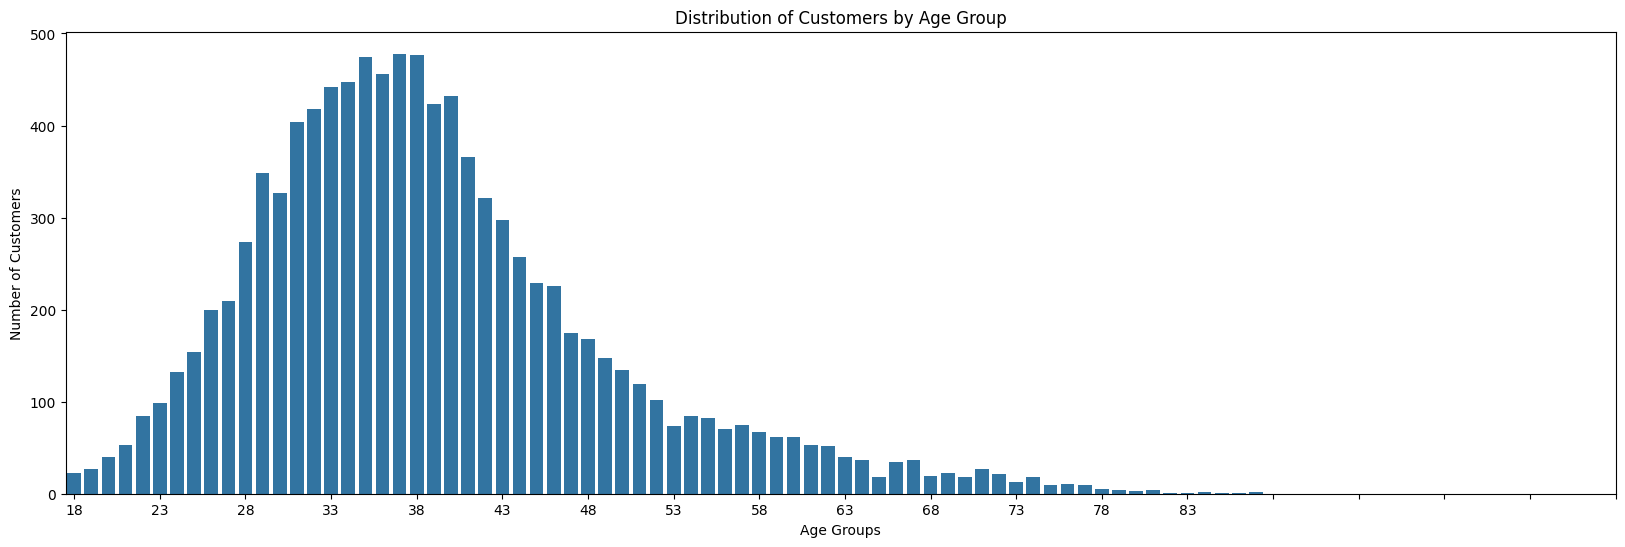

In [ ]:
# Get the distribution of customers across different age groups
age_distribution = df['Age'].value_counts()
plt.figure(figsize=(20, 6))
sns.barplot(x=age_distribution.index, y=age_distribution.values)
plt.xticks(np.arange(0, 95, step=5))
plt.xlabel("Age Groups")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customers by Age Group")
plt.show()

Age Distribution Age
18    22
19    27
20    40
21    53
22    84
      ..
83     1
84     2
85     1
88     1
92     2
Name: count, Length: 70, dtype: int64
Percentage Distribution Age
18    0.22
19    0.27
20    0.40
21    0.53
22    0.84
      ... 
83    0.01
84    0.02
85    0.01
88    0.01
92    0.02
Name: count, Length: 70, dtype: float64


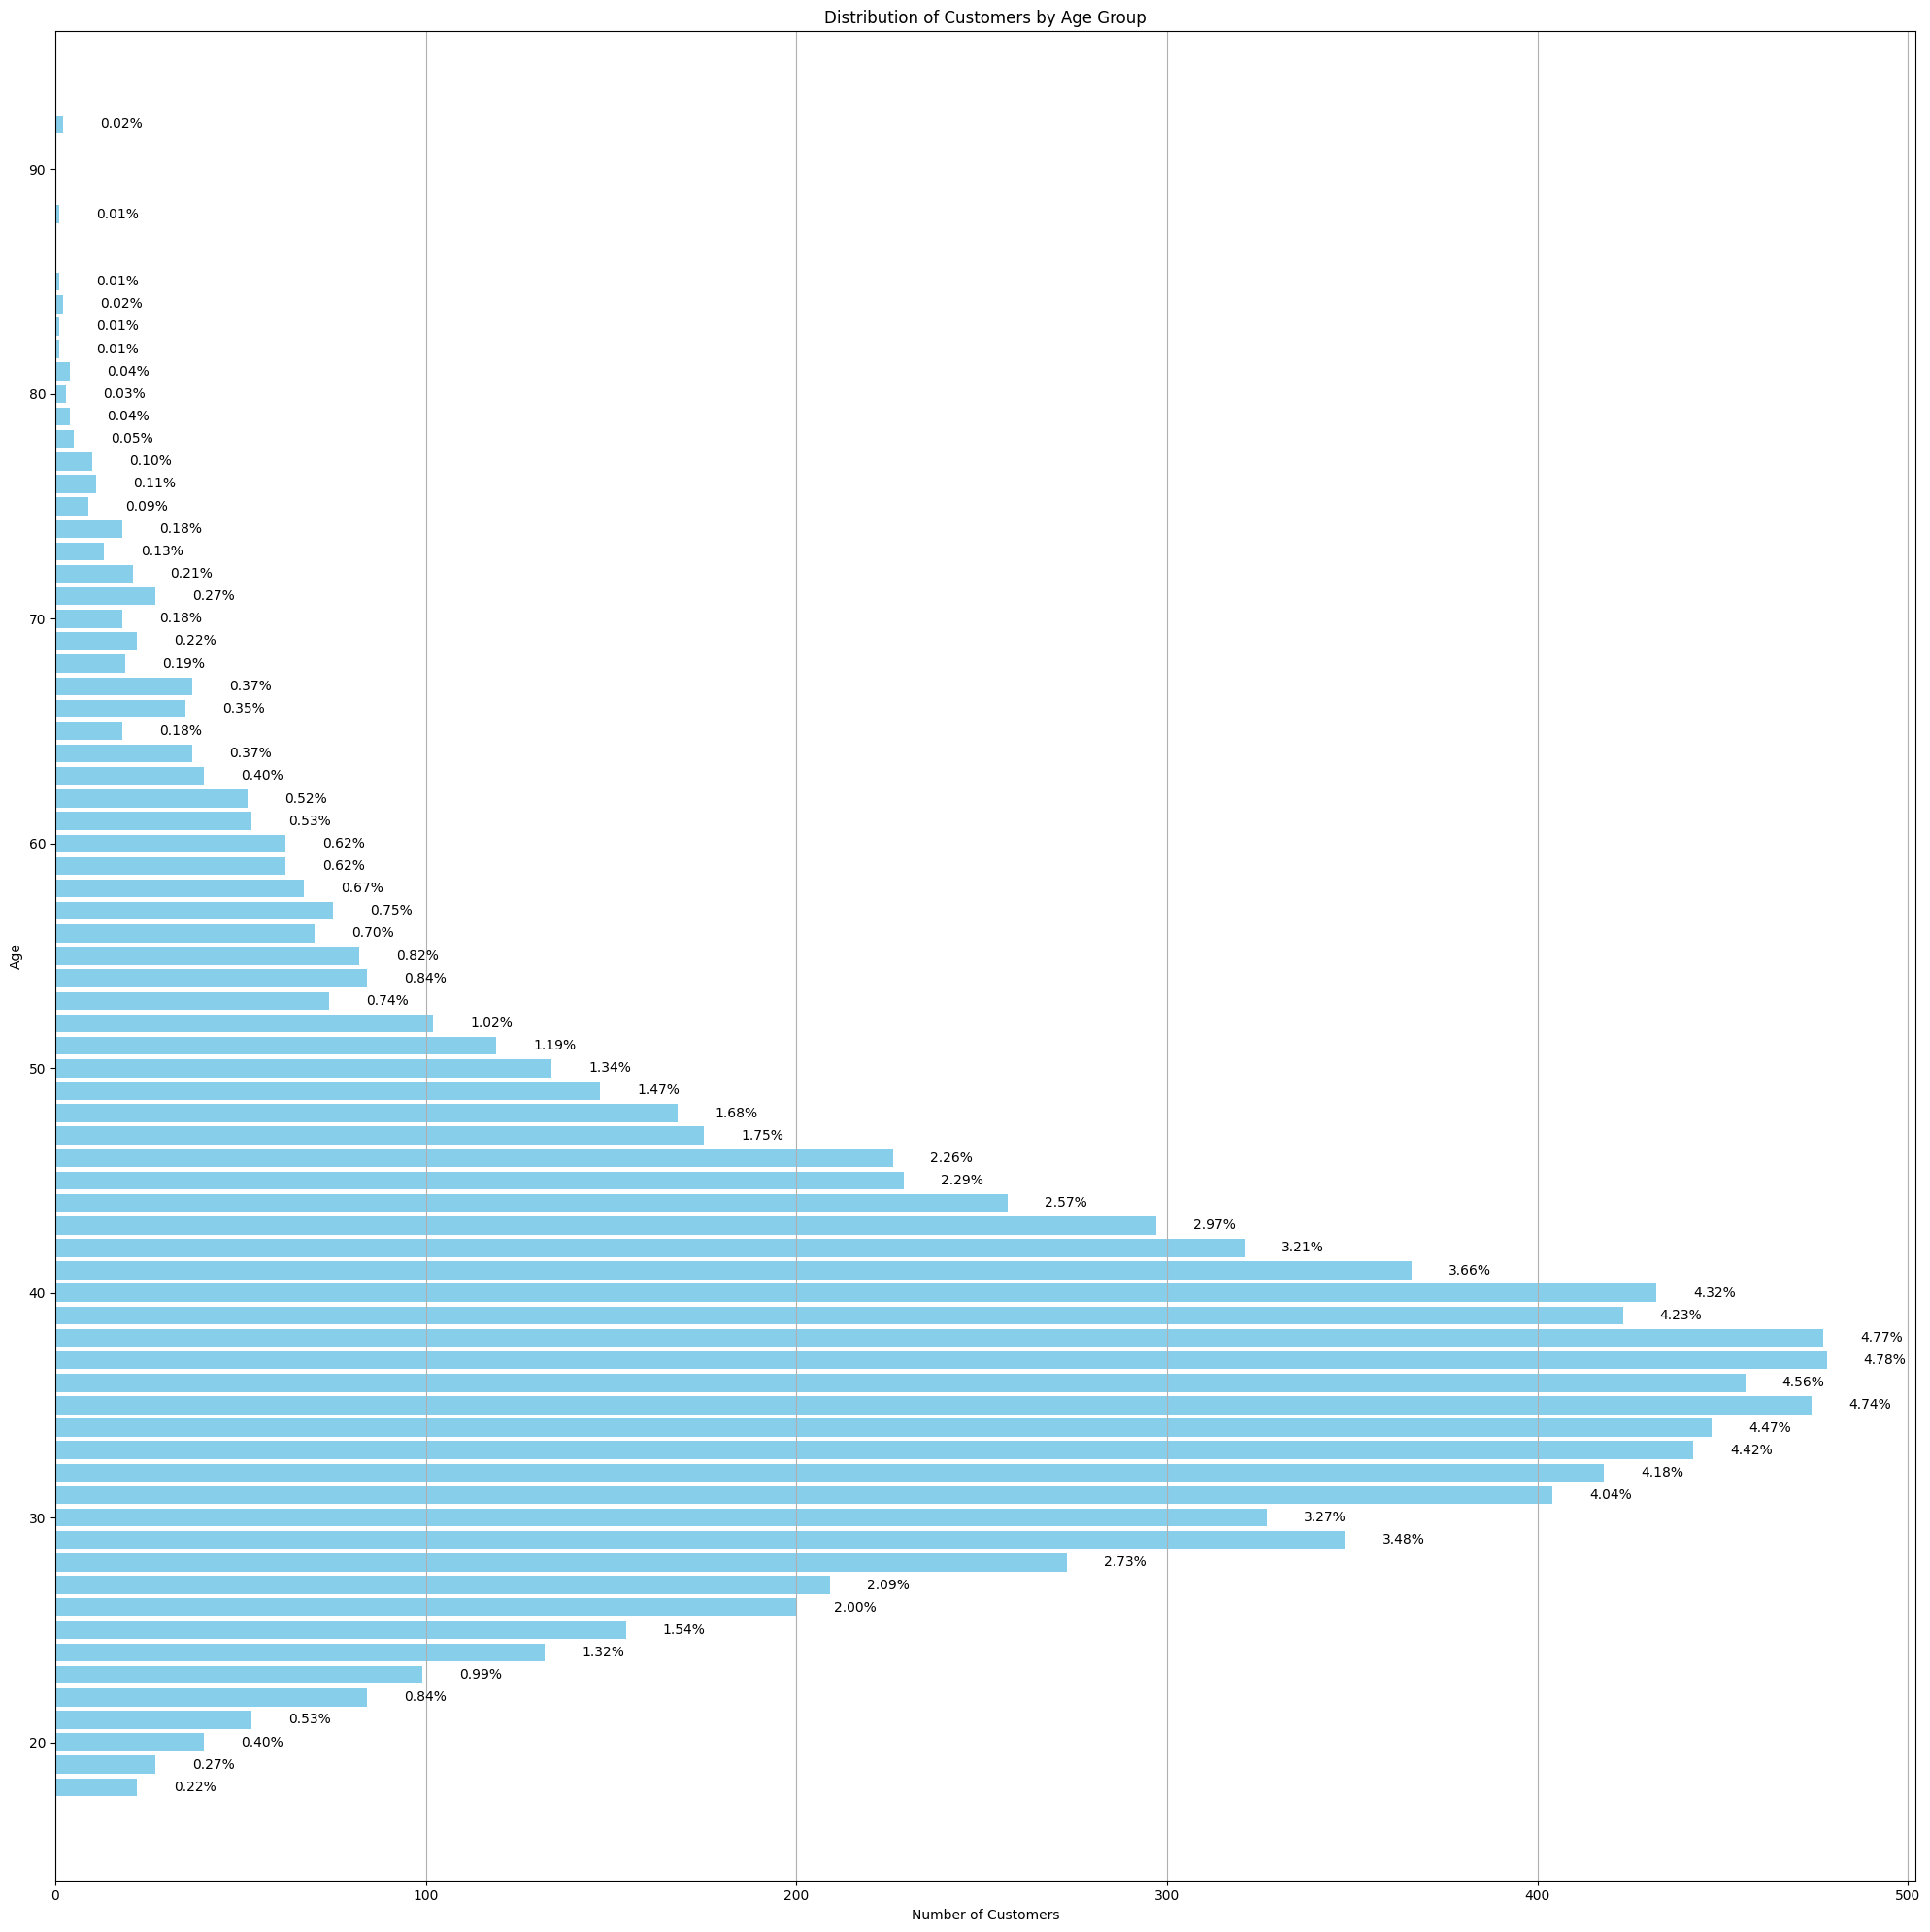

In [ ]:
age_distribution = df['Age'].value_counts().sort_index()

# Calculate the percentage distribution
total_customers = age_distribution.sum()
percentage_distribution = (age_distribution / total_customers) * 100

# Print the age distribution and percentage distribution
print(f"Age Distribution",age_distribution)
print(f"Percentage Distribution",percentage_distribution)

# Plotting the age distribution as a horizontal bar chart with percentages
plt.figure(figsize=(20, 20))
bars = plt.barh(age_distribution.index, age_distribution.values, color='skyblue')

# Adding labels and title
plt.xlabel("Number of Customers")
plt.ylabel("Age")
plt.title("Distribution of Customers by Age Group")

# Adding percentage labels to each bar
for bar, percentage in zip(bars, percentage_distribution):
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, f'{percentage:.2f}%', va='center')

# Adding grid lines for better readability
plt.grid(axis='x')

# Display the chart
plt.tight_layout()
plt.show()


In [ ]:
gender_distribution = df['Gender'].value_counts()


total_customers = gender_distribution.sum()
percentage_distribution = (gender_distribution / total_customers) * 100
print(gender_distribution)
print(percentage_distribution)

Gender
Male      5457
Female    4543
Name: count, dtype: int64
Gender
Male      54.57
Female    45.43
Name: count, dtype: float64


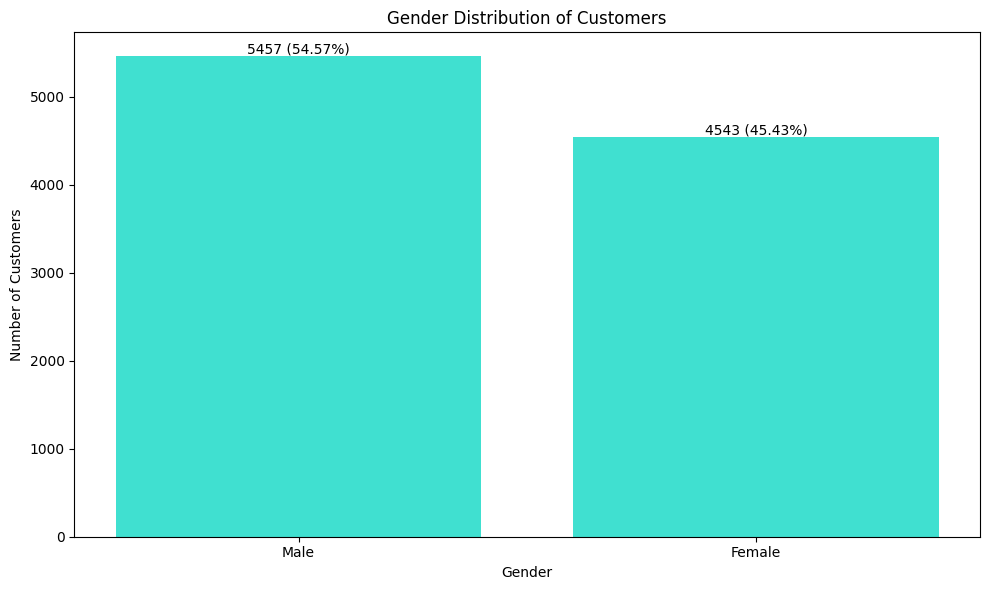

In [ ]:
# Plotting the gender distribution as a bar chart with percentages
plt.figure(figsize=(10, 6))
bars = plt.bar(gender_distribution.index, gender_distribution.values, color='turquoise')

# Adding labels and title
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.title("Gender Distribution of Customers")

# Adding number of customers and percentage labels to each bar
for bar, count, percentage in zip(bars, gender_distribution.values, percentage_distribution):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, f'{count} ({percentage:.2f}%)', ha='center', va='bottom', color='black')


# Display the chart
plt.tight_layout()
plt.show()


# 2.  Churn Analysis:
   - What percentage of customers have churned?
   - What are the main reasons for customer churn?
   - Identify any patterns or trends among customers who have churned.


In [ ]:
churned_customers = df.groupby('churned').size()
churned_customers


churned
0    7963
1    2037
dtype: int64

In [ ]:
perc_churned_customers = (churned_customers[1]/(churned_customers[0]+churned_customers[1]))*100
perc_churned_customers

20.369999999999997

In [ ]:
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Hargrave'

<Figure size 2000x600 with 0 Axes>

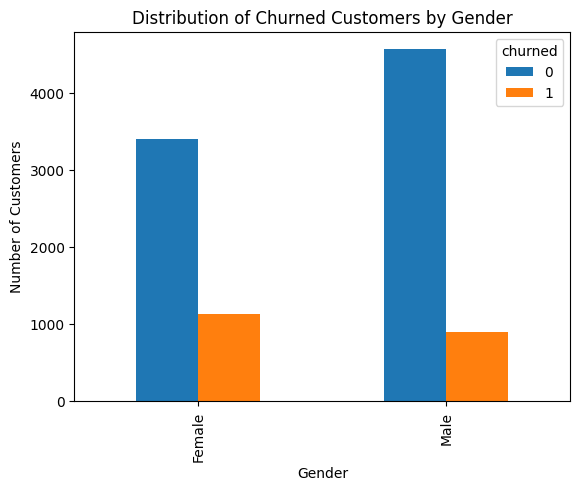

In [ ]:
churned_by_gender = df.groupby(['Gender', 'churned']).size().unstack()

# Plot the bar chart
plt.figure(figsize=(20, 6))
churned_by_gender.plot(kind='bar')

plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.title("Distribution of Churned Customers by Gender")
plt.show()


<Figure size 2000x600 with 0 Axes>

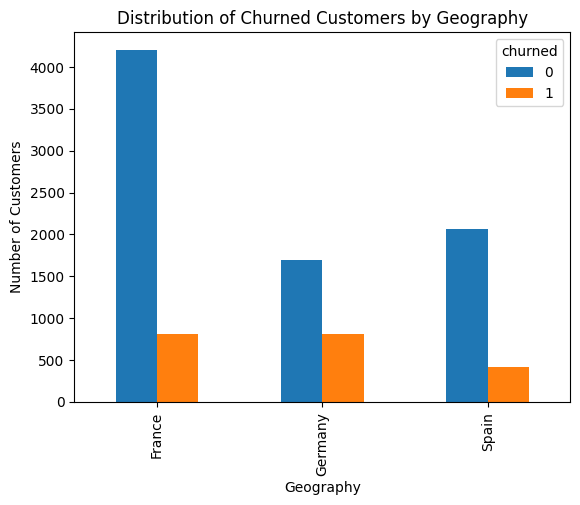

In [ ]:
churned_by_geography = df.groupby(['Geography', 'churned']).size().unstack()

# Plot the bar chart
plt.figure(figsize=(20, 6))
churned_by_geography.plot(kind='bar')

plt.xlabel("Geography")
plt.ylabel("Number of Customers")
plt.title("Distribution of Churned Customers by Geography")
plt.show()


<Figure size 2000x600 with 0 Axes>

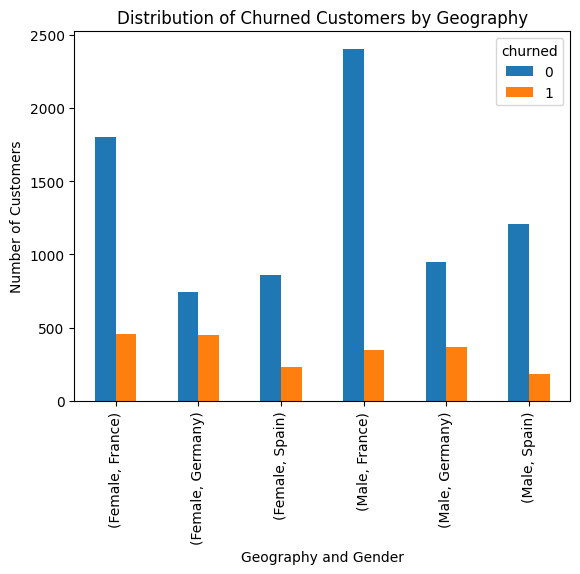

In [ ]:
churned_by_gen_geo = df.groupby(['Gender','Geography', 'churned']).size().unstack()

# Plot the bar chart
plt.figure(figsize=(20, 6))
churned_by_gen_geo.plot(kind='bar')

plt.xlabel("Geography and Gender")
plt.ylabel("Number of Customers")
plt.title("Distribution of Churned Customers by Geography")
plt.show()


In [ ]:

churned_customers = df[df['churned'] == True]

# Analyze spending habits
avg_spending_churned = churned_customers['CreditScore'].mean()
avg_spending_non_churned = df[df['churned'] == False]['CreditScore'].mean()

# Compare average spending
if avg_spending_churned > avg_spending_non_churned:
    print("Churned customers tend to have higher spending.")
else:
    print("Churned customers tend to have lower spending.")




Churned customers tend to have lower spending.


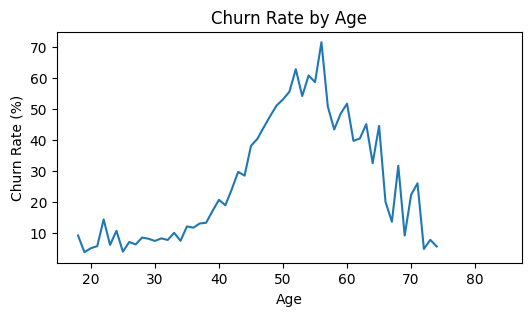

In [ ]:

# Group data by age and churn
grouped_data = df.groupby(['Age', 'churned']).size().unstack()


# Calculate churn rate for each age group
churn_rate_by_age = (grouped_data[1] / (grouped_data[0] + grouped_data[1])) * 100

# Create a line chart
plt.figure(figsize=(6, 3))
plt.plot(churn_rate_by_age.index, churn_rate_by_age.values)

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Age")

# Show the chart
plt.show()


In [ ]:
group = df.groupby(['churned', 'EstimatedSalary']).size()
group

churned  EstimatedSalary
0        90.07              1
         96.27              1
         106.67             1
         142.81             1
         143.34             1
                           ..
1        199304.74          1
         199378.58          1
         199693.84          1
         199725.39          1
         199808.10          1
Length: 9999, dtype: int64

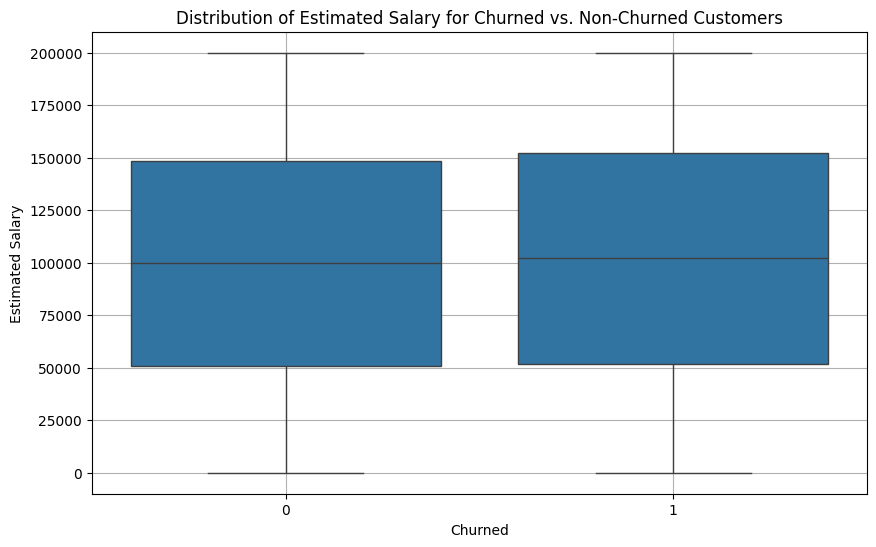

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='churned', y='EstimatedSalary', data=df)
plt.xlabel('Churned')
plt.ylabel('Estimated Salary')
plt.title('Distribution of Estimated Salary for Churned vs. Non-Churned Customers')
plt.grid(True)
plt.show()

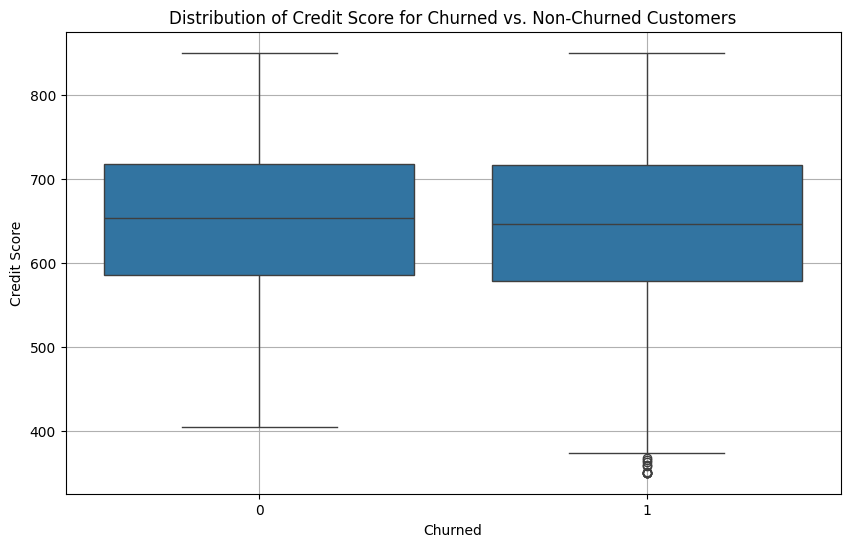

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='churned', y='CreditScore', data=df)
plt.xlabel('Churned')
plt.ylabel('Credit Score')
plt.title('Distribution of Credit Score for Churned vs. Non-Churned Customers')
plt.grid(True)
plt.show()


**Observations from the Plot:**

**Median Credit Score:** The median credit score for non-churned customers is significantly higher than that of churned customers.

**Distribution Spread:** The credit scores of non-churned customers are more spread out compared to churned customers, as indicated by the longer box and whiskers for non-churned customers.

**Outliers:**  There are some outlier credit scores for both churned and non-churned customers, represented by the individual points beyond the whiskers.

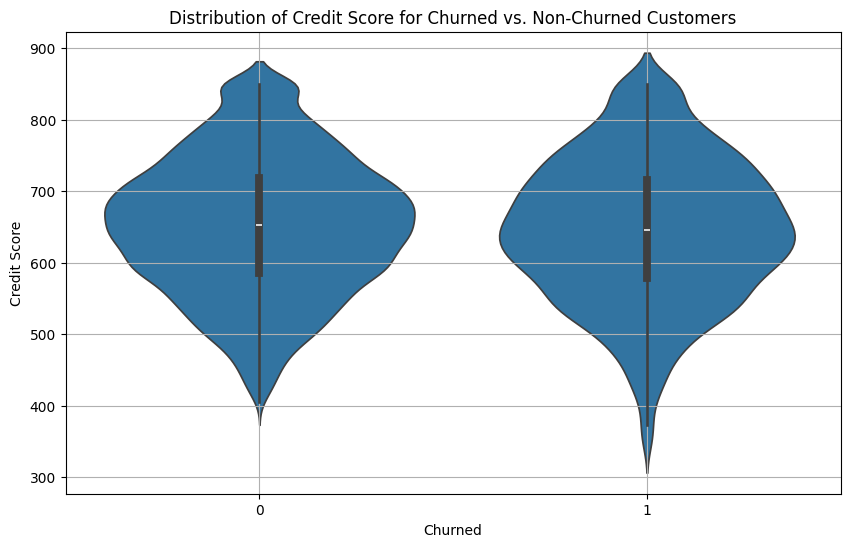

In [ ]:
plt.figure(figsize=(8, 3))
sns.violinplot(x='churned', y='CreditScore', data=df)
plt.xlabel('Churned')
plt.ylabel('Credit Score')
plt.title('Distribution of Credit Score for Churned vs. Non-Churned Customers')
plt.grid(True)
plt.show()


The graph suggests that customers with lower credit scores are more likely to churn. While non-churned customers tend to have higher credit scores, there is still a significant portion with lower scores. This indicates that credit score alone might not be a strong predictor of churn, and other factors should be considered.

# 3.  Product Usage:
   - What are the most commonly used products or services?
   - Analyze the usage patterns of different customer segments.


<Figure size 1000x600 with 0 Axes>

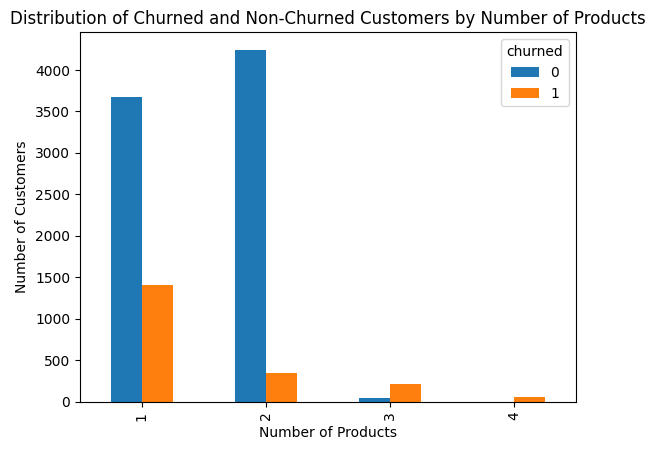

In [ ]:
# Group data by number of products and churn
grouped_data = df.groupby(['NumOfProducts', 'churned']).size().unstack()

# Create a bar chart
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar')

# Add labels and title
plt.xlabel("Number of Products")
plt.ylabel("Number of Customers")
plt.title("Distribution of Churned and Non-Churned Customers by Number of Products")

# Show the chart
plt.show()


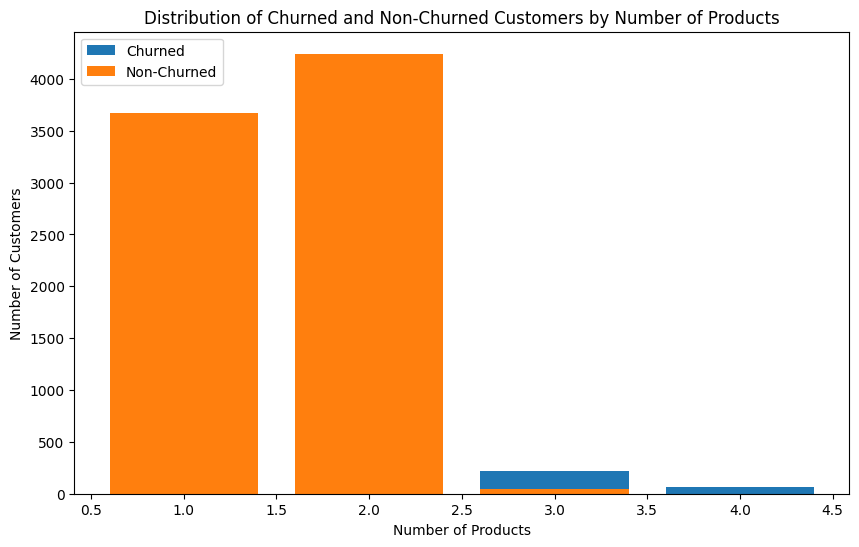

In [ ]:
# Group the data by number of products and churn
grouped_data = df.groupby(['NumOfProducts', 'churned']).size().unstack()

# Get the number of churned and non-churned customers for each number of products
churned = grouped_data[1]
non_churned = grouped_data[0]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(churned.index, churned, label='Churned')
plt.bar(non_churned.index, non_churned, label='Non-Churned')

# Add labels and title
plt.xlabel('Number of Products')
plt.ylabel('Number of Customers')
plt.title('Distribution of Churned and Non-Churned Customers by Number of Products')

# Add legend and show the plot
plt.legend()
plt.show()


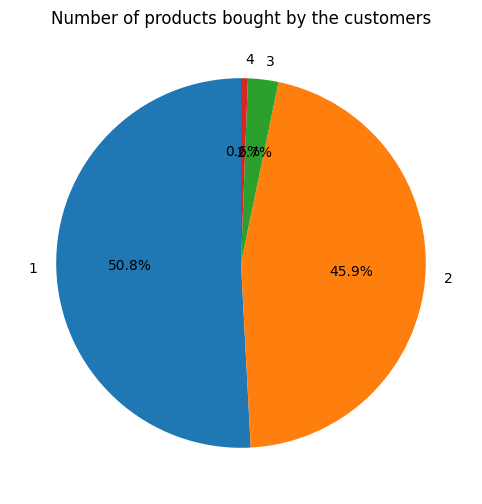

In [ ]:

product_usage = df['NumOfProducts'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(product_usage, labels=product_usage.index, autopct="%1.1f%%", startangle=90)
plt.title("Number of products bought by the customers")
plt.show()



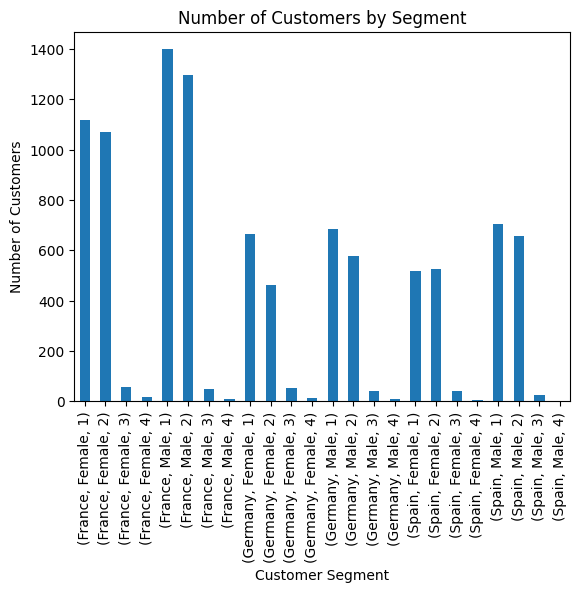

In [ ]:

grouped_data = df.groupby(['Geography', 'Gender', 'NumOfProducts'])

# Calculate the count of customers for each group
customer_count_by_segment = grouped_data.size()

# Print the number of customers in each segment
customer_count_by_segment

# Create a bar chart to visualize the number of customers in each segment
customer_count_by_segment.plot(kind='bar')

plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.title("Number of Customers by Segment")
plt.show()




# 4.  Financial Analysis:
   - What is the average account balance of customers?
   - Compare the financial characteristics of churned vs. non-churned customers.


In [ ]:

# Calculate the average account balance of customers
average_balance = df['Balance'].mean()
print(f"Average account balance: {average_balance}\n")

# Compare the financial characteristics of churned vs. non-churned customers
churned_customers = df[df['churned'] == True]
non_churned_customers = df[df['churned'] == False]

# Compare the average account balances
print(f"Average balance of churned customers: {churned_customers['Balance'].mean()}")
print(f"Average balance of non-churned customers: {non_churned_customers['Balance'].mean()}\n")

# Compare other financial characteristics, such as average credit score, average tenure, etc.
# ...
print(f"Average Credit Score of churned customers: {churned_customers['CreditScore'].mean()}")
print(f"Average Credit Score of non-churned customers: {non_churned_customers['CreditScore'].mean()}\n")

print(f"Average tenure of churned customers:{churned_customers['Tenure'].mean()}")
print(f"Average tenure of non-churned customers:{non_churned_customers['Tenure'].mean()}\n")

print(f"Average of Estimated Salary of churned customers:{churned_customers['EstimatedSalary'].mean()}")
print(f"Average of Estimated Salary of non-churned customers:{non_churned_customers['EstimatedSalary'].mean()}")

Average account balance: 76485.889288

Average balance of churned customers: 91108.53933726068
Average balance of non-churned customers: 72745.2967788522

Average Credit Score of churned customers: 645.3514972999509
Average Credit Score of non-churned customers: 651.8531960316463

Average tenure of churned customers:4.932744231713304
Average tenure of non-churned customers:5.033278914981791

Average of Estimated Salary of churned customers:101465.67753068237
Average of Estimated Salary of non-churned customers:99738.39177194524


# 5.Predictive Modeling:
   - Which factors are the most significant predictors of customer churn?
   - Develop a predictive model to identify at-risk customers.

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler # Import StandardScaler


# Encode categorical features
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Split the dataset into training and testing sets
X = df.drop(['RowNumber',   'CustomerId',   'Surname','churned','HasCrCard','IsActiveMember'], axis=1)
y = df['churned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit and transform on training data
X_test_scaled = scaler.transform(X_test) # Transform test data using the same scaler

# Train the Random Forest model (use scaled data)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# top_features = np.argsort(model.feature_importances_)[-10:]
# top_features = np.append(top_features,-1)
# display(X.iloc[:,top_features].corr())


df_corr = X.copy()
df_corr['churned'] = y
corr_matrix = df_corr.corr()
corr_matrix

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,churned
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.014204,-0.047820
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,1.000000,0.012097
churned,-0.027094,0.035943,-0.106512,0.285323,-0.014001,0.118533,-0.047820,0.012097,1.000000


In [ ]:
model.score(X_test_scaled, y_test)

0.8565

In [ ]:

importances = model.feature_importances_

# Sort the features by their importance
sorted_indices = np.argsort(importances)[::-1]

# Print the top 5 features
print("Top 5 features in decreasing order of importance:")
for i in range(5):
    print(f"{i+1}. {X.columns[sorted_indices[i]]}")


Top 5 features in decreasing order of importance:
1. Age
2. EstimatedSalary
3. CreditScore
4. Balance
5. NumOfProducts
